In [12]:
from typing import TypedDict
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float



In [13]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state
def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 82.0
    return state

In [14]:
from langgraph.graph import StateGraph,START, END
builder = StateGraph(PortfolioState)
builder.add_node("calc_total", calc_total)
builder.add_node("convert_to_inr", convert_to_inr)
builder.add_edge(START, "calc_total")
builder.add_edge("calc_total", "convert_to_inr")
builder.add_edge("convert_to_inr", END)
graph = builder.compile()


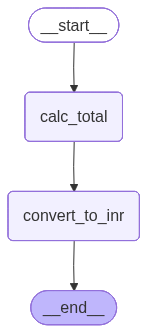

In [15]:
from IPython.display import display,Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
graph.invoke({'amount_usd': 100.0})

{'amount_usd': 100.0, 'total_usd': 108.0, 'total_inr': 8856.0}